# -*- coding: utf-8 -*-
"""cat_dog.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1APVZsioJqjaf5wrKbqt923__kVT__G5b
"""


In [1]:
# !pip3 install -Uqq tensorflow

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

2024-03-01 17:34:48.084630: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-01 17:34:48.131611: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 17:34:48.131632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 17:34:48.134457: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-01 17:34:48.141104: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# Get project files
# !wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
# !unzip cats_and_dogs.zip

In [4]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

In [5]:
# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [6]:
# Variables for pre-processing and training.
batch_size = 128
epochs = 100
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           shuffle = True,
                                                           batch_size=batch_size,
                                                           target_size= IMG_SIZE,
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              shuffle = True,
                                                              batch_size=batch_size,
                                                              target_size=IMG_SIZE,
                                                              class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(directory=PATH,
                                                         classes=['test'],
                                                         target_size=IMG_SIZE,
                                                         batch_size=batch_size,
                                                         shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


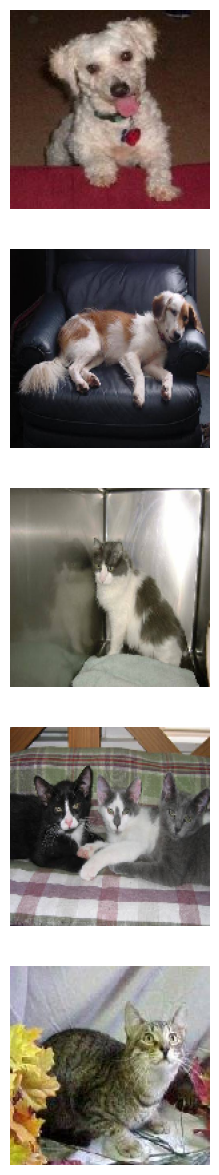

In [8]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           rotation_range=45,
                                           horizontal_flip=True,
                                           vertical_flip=True,
                                           validation_split = .2)

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

# augmented_images = [train_data_gen[0][0][0] for i in range(5)]

# plotImages(augmented_images)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(2))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Found 2000 images belonging to 2 classes.


2024-03-01 17:34:59.882422: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-01 17:34:59.889120: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-01 17:34:59.889142: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-01 17:34:59.892494: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-01 17:34:59.892514: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-01 17:35:00.009257: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-01 17:35:00.009284: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-01 17:35:00.009289: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2022] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2024-03-01 17:35:00.009306: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000

In [11]:
history = model.fit(x=train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size)

Epoch 1/100


2024-03-01 17:35:07.284995: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2024-03-01 17:35:08.069221: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe3343540d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-01 17:35:08.069245: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2024-03-01 17:35:08.073290: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709314508.124053     339 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 [==============================] - 7s 280ms/step - loss: 1.3770 - accuracy: 0.5203 - val_loss: 0.6977 - val_accuracy: 0.5089
Epoch 2/100
15/15 [==============================] - 5s 302ms/step - loss: 0.6880 - accuracy: 0.5358 - val_loss: 0.6719 - val_accuracy: 0.5993
Epoch 3/100
15/15 [==============================] - 5s 299ms/step - loss: 0.6785 - accuracy: 0.5513 - val_loss: 0.6642 - val_accuracy: 0.5971
Epoch 4/100
15/15 [==============================] - 5s 298ms/step - loss: 0.6688 - accuracy: 0.5839 - val_loss: 0.6390 - val_accuracy: 0.6540
Epoch 5/100
15/15 [==============================] - 5s 299ms/step - loss: 0.6430 - accuracy: 0.6394 - val_loss: 0.6306 - val_accuracy: 0.6295
Epoch 6/100
15/15 [==============================] - 5s 298ms/step - loss: 0.6300 - accuracy: 0.6368 - val_loss: 0.6213 - val_accuracy: 0.6462
Epoch 7/100
15/15 [==============================] - 5s 298ms/step - loss: 0.6308 - accuracy: 0.6458 - val_loss: 0.6253 - val_accuracy: 0.6440
Epoch 8/100

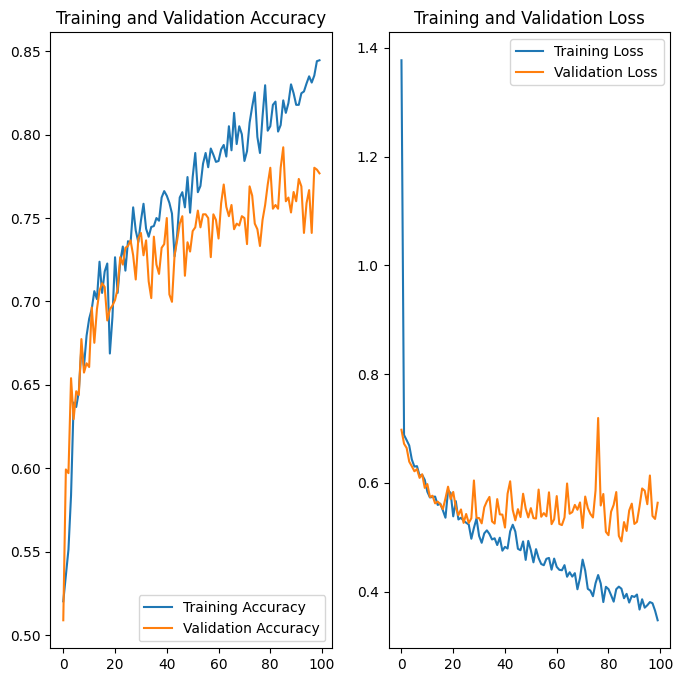

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From the diagram, around 20 epoch would be the best to prevent overfitting

In [13]:
test_images, _ = next(test_data_gen)
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
# plotImages(test_images, probabilities=probabilities)

1/1 [==============================] - 0s 500ms/step


In [14]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

Your model correctly identified 78.0% of the images of cats and dogs.


Transfer learning with ResNet50

In [15]:
model_res = Sequential()
model_res.add(tf.keras.applications.ResNet50(include_top=False,
                                             weights = "imagenet",
                                             input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model_res.add(Flatten())
model_res.add(Dense(64))
model_res.add(Dense(2))
model_res.layers[0].trainable = False

model_res.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_res.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                3276864   
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 26864706 (102.48 MB)
Trainable params: 3276994 (12.50 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [16]:
history = model_res.fit(x=train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size)

Epoch 1/100
15/15 [==============================] - 8s 377ms/step - loss: 4.1614 - accuracy: 0.5091 - val_loss: 2.4093 - val_accuracy: 0.5011
Epoch 2/100
15/15 [==============================] - 5s 309ms/step - loss: 1.5665 - accuracy: 0.5156 - val_loss: 1.4162 - val_accuracy: 0.4900
Epoch 3/100
15/15 [==============================] - 5s 303ms/step - loss: 0.9602 - accuracy: 0.5358 - val_loss: 0.9458 - val_accuracy: 0.5212
Epoch 4/100
15/15 [==============================] - 5s 306ms/step - loss: 0.7708 - accuracy: 0.5657 - val_loss: 0.7937 - val_accuracy: 0.5324
Epoch 5/100
15/15 [==============================] - 5s 301ms/step - loss: 0.7091 - accuracy: 0.5604 - val_loss: 0.6545 - val_accuracy: 0.6239
Epoch 6/100
15/15 [==============================] - 5s 305ms/step - loss: 0.6683 - accuracy: 0.6036 - val_loss: 0.6353 - val_accuracy: 0.6529
Epoch 7/100
15/15 [==============================] - 5s 305ms/step - loss: 0.6540 - accuracy: 0.6197 - val_loss: 0.7082 - val_accuracy: 0.5491

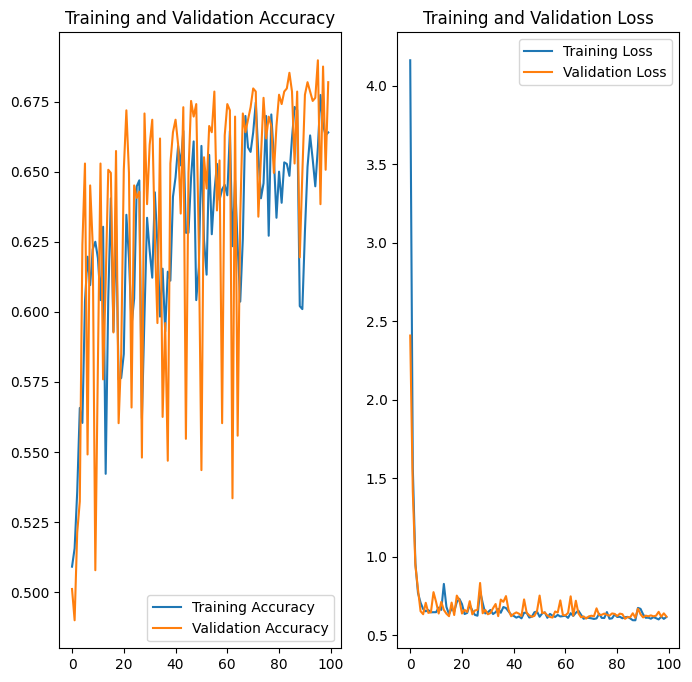

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Require only a few epochs 

In [18]:
test_images, _ = next(test_data_gen)
probabilities1 = np.argmax(model_res.predict(test_data_gen), axis=-1)

1/1 [==============================] - 1s 1s/step


In [19]:
correct1 = 0
answers1 =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]
for probability1, answer1 in zip(probabilities1, answers1):
  if round(probability1) == answer1:
    correct1 +=1

In [20]:
percentage_identified1 = (correct1 / len(answers1)) * 100

passed_challenge = percentage_identified1 >= 63

print(f"Your model correctly identified {round(percentage_identified1, 2)}% of the images of cats and dogs.")

Your model correctly identified 76.0% of the images of cats and dogs.
